In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=500,n_features=2,cluster_std=.8,centers=4)

In [5]:
d,c = data

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
plt.style.use('ggplot')

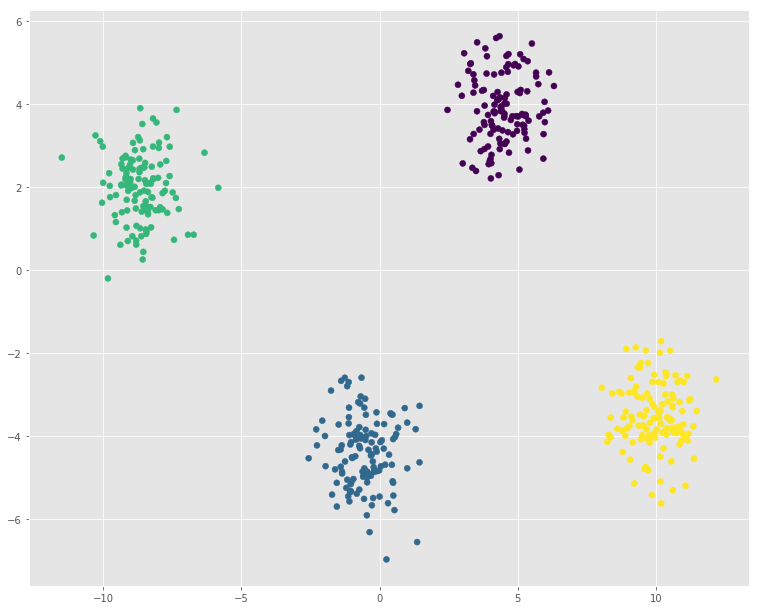

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
ax.scatter(d[:,0],d[:,1],c=c)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(d, c, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans()

In [16]:
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
pred = km.predict(X_test)

In [24]:
error = []
e = []
for i in range(2,10):
    km = KMeans(i)
    km.fit(X_train)
    pred = km.predict(X_test)
    error.append(km.inertia_)
    e.append(np.mean(np.equal(pred,y_test)))
    

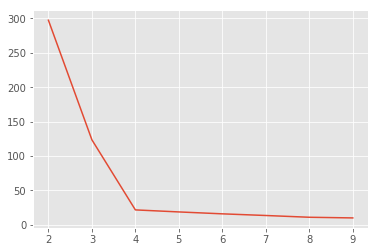

In [26]:
plt.plot(range(2,10),error)

In [27]:
def distance(point,center):
    return np.sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2)

In [55]:
def max_distance(X,y,n_clusters,clusters):
    """
    X: ndarray or 2d list containing the data
    y: 1d array or a list containing predicted observation 
    n_clusters: int, the number of clusters used in KMeans algorithme
    clusters: ndarray contating the centroids
    
    returns: 1d array contaning the max distances from the center of the clusters to the data point
    """
    distances = np.zeros(n_clusters)
    for d,c in zip(X,y):
        if c == 0:
            distances[0] = max(distance(d,clusters[0]),distances[0])
        elif c == 1:
            distances[1] = max(distance(d,clusters[1]),distances[1])
        elif c == 2:
            distances[2] = max(distance(d,clusters[2]),distances[2])
        else:
            distances[3] = max(distance(d,clusters[3]),distances[3])
            
    return distances

In [106]:
plt.style.use('seaborn')
from matplotlib.patches import Ellipse

In [124]:
def plot_clusters(X=None,Y=None,clusters=[],figsize=(),title=''):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([1,1,1,1])
    ax.scatter(X[:,0],X[:,1])
    ax.set_xlim(X.min()-1,X.max() +1 )
    for i in range(len(clusters)):
        ax.scatter(clusters[i][0],clusters[i][1],label='C' + str(i))
    for x,y in zip(X,Y):
        if y == 0:
            ax.plot([x[0], clusters[0][0]],[x[1], clusters[0][1]] )
        elif y == 1:
            ax.plot([x[0], clusters[1][0]],[x[1], clusters[1][1]] )
        elif y == 2:
            ax.plot([x[0], clusters[2][0]],[x[1], clusters[2][1]] )
        else:
            ax.plot([x[0], clusters[3][0]],[x[1], clusters[3][1]] )
    distances = max_distance(X,Y,len(np.unique(Y)),clusters)
    for i in range(len(clusters)):
        ax.add_artist(Ellipse((clusters[i][0],clusters[i][1]),distances[i],height=2,ec='r',ls='r-',fill=False))
    ax.legend()
    return ax

ValueError: Unrecognized linestyle: r--

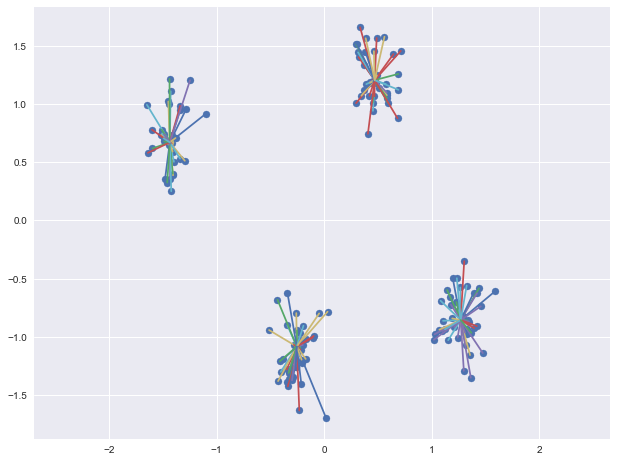

In [125]:
plot_clusters(X_test,pred,km.cluster_centers_,(8,6))

In [46]:
km = KMeans(4)

In [47]:
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
pred = km.predict(X_test)

In [49]:
max_distance(X_test,y_test,4,km.cluster_centers_)

array([2.80308843, 2.93695168, 3.45376351, 3.45150477])

In [54]:
type(max_distance(X_test,pred,4,km.cluster_centers_))

numpy.ndarray

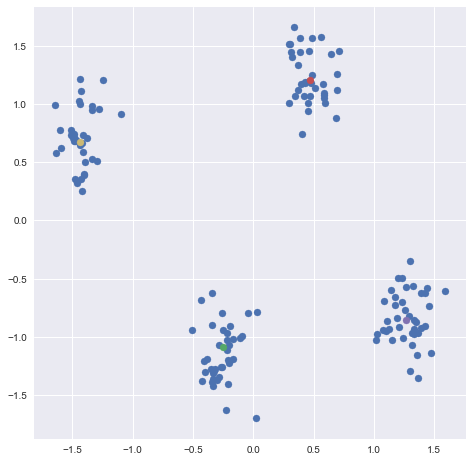

In [53]:
plot_clusters(X_test,km.cluster_centers_,(6,6))

In [78]:
from mpl_toolkits.mplot3d import Axes3D

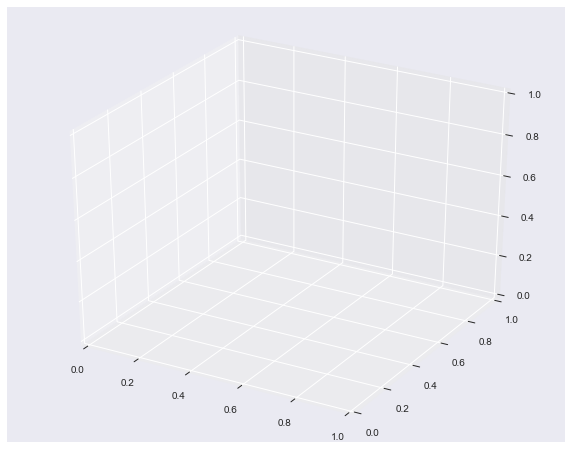

In [81]:
fig = plt.figure(figsize=(10,8))
axes = fig.add_subplot(111,projection='3d')

In [101]:
len(np.unique(y_test))

4